<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Capstone Project — The Battle of Neighborhoods in Birmingham: Restaurant</font></h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#item1">Download and Explore Dataset</a>

2.  <a href="#item2">Explore Neighborhoods in Birmingham</a>

3.  <a href="#item3">Analyze Each Neighborhood</a>

4.  <a href="#item4">Cluster Neighborhoods</a>

5.  <a href="#item5">Examine Clusters</a>  
    </font>
    </div>


In [2]:

from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd

# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cm
import matplotlib.colors as colors

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
#import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


## 1.Download and Explore 

In [4]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Birmingham').text

In [5]:
soup = BeautifulSoup(source,'lxml')
My_Table = soup.find('ul')

In [7]:
Neighborhood = My_Table.text.split('\n')


In [9]:
len(Neighborhood)

186

In [10]:
latitude = []
longitude = []
for i in range(len(Neighborhood)):
    address = str(Neighborhood[i]+', England')
    geolocator = Nominatim(user_agent="birmingham_explorer")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
    location = geolocator.geocode(address)
    try: 
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        latitude.append("Not Found")
        longitude.append("Not Found")
    
print('Done!')

Done!


In [11]:
headers = ['Neighborhood', 'Latitude', 'Longitude']

In [12]:
df = pd.DataFrame(list(zip(Neighborhood, latitude, longitude)), 
               columns = headers) 

In [13]:
df

,Neighborhood,Latitude,Longitude
0,Acocks Green,52.4495,-1.81924
1,Alum Rock,52.4871,-1.83153
2,Ashted,52.4861,-1.88381
3,Aston,52.5007,-1.88419
4,Aston Cross,52.001,-2.08718
5,Austin Village,52.4009,-1.97269
6,Balsall Heath,52.4572,-1.88321
7,Balti Triangle,52.4576,-1.87664
8,Bartley Green,52.4359,-1.99489
9,Beech Lanes,52.4659,-1.98457


In [14]:
address = 'Birmingham, England'

geolocator = Nominatim(user_agent="birmingham_explorer")
location = geolocator.geocode(address)
lat_e = location.latitude
long_e = location.longitude
print('The geograpical coordinate of Birmingham City are {}, {}.'.format(lat_e, long_e))

The geograpical coordinate of Birmingham City are 52.4796992, -1.9026911.


In [15]:
df = df.dropna(subset = ['Latitude','Longitude'])
#register = register.dropna(subset=['Entity','Entity_number'])

In [16]:
df = df[df.Latitude != 'Not Found']

In [18]:
df = df.reset_index()


In [20]:
df.drop('index',
  axis='columns', inplace=True)

In [21]:
df

,Neighborhood,Latitude,Longitude
0,Acocks Green,52.4495,-1.81924
1,Alum Rock,52.4871,-1.83153
2,Ashted,52.4861,-1.88381
3,Aston,52.5007,-1.88419
4,Aston Cross,52.001,-2.08718
5,Austin Village,52.4009,-1.97269
6,Balsall Heath,52.4572,-1.88321
7,Balti Triangle,52.4576,-1.87664
8,Bartley Green,52.4359,-1.99489
9,Beech Lanes,52.4659,-1.98457


In [22]:
map_Birmingham = folium.Map(location=[lat_e, long_e], zoom_start=10)

# add markers to map
for lat, lng, Neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Birmingham)  
    
map_Birmingham

In [23]:
CLIENT_ID = 'OXYFXZX0FCGRMRXCQ5332GQ31XVRMQSHO2LPOQJODW1T202P' # your Foursquare ID
CLIENT_SECRET = 'S2QSDGVOZLEB0H45LMR0BLHI3H5NAABLPOLDQW4OBKJGUCVX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OXYFXZX0FCGRMRXCQ5332GQ31XVRMQSHO2LPOQJODW1T202P
CLIENT_SECRET:S2QSDGVOZLEB0H45LMR0BLHI3H5NAABLPOLDQW4OBKJGUCVX


In [24]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
Birmingham_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Acocks Green
Alum Rock
Ashted
Aston
Aston Cross
Austin Village
Balsall Heath
Balti Triangle
Bartley Green
Beech Lanes
Bickenhill
Billesley
Birches Green
Birchfield
Birmingham City Centre
Boldmere
Bordesley
Bordesley Green
Bournbrook
Bournville
Brandwood End
Brindleyplace
Bromford
Browns Green
Buckland End
California
Camp Hill
Castle Vale
Chad Valley
Chinese Quarter
Churchfield
Cole End, Coleshill
Coleshill
Cotteridge
Deritend
Digbeth
Doe Bank
Driffold
Druids Heath
Duddeston
Eastside
Edgbaston
Erdington
Falcon Lodge
Fordbridge
Five Ways
Four Oaks
Fox Hollies
Frankley
Gannow Green
Garretts Green
Gib Heath
Gilbertstone
Gilson
Glebe Farm
Gosta Green
Gravelly Hill
Great Barr
Greet
Gun Quarter
Hall Green
Hamstead
Handsworth
Handsworth Wood
Harborne
Harts Green
Hawkesley
Hay Mills
High Heath
Highgate
Highter's Heath
Hill Hook
Hill Wood
Hockley
Hodge Hill
Jewellery Quarter
Kents Moat
Kings Heath
Kings Norton
Kingstanding
Kitts Green
Ladywood
Lea Hall
Lee Bank
The Leverretts
Ley Hill
Lifford
Li

In [27]:
print(Birmingham_venues.shape)
Birmingham_venues.head()

(1672, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acocks Green,52.44953,-1.819238,Costa Coffee,52.446411,-1.822441,Coffee Shop
1,Acocks Green,52.44953,-1.819238,wilko,52.446645,-1.823626,Furniture / Home Store
2,Acocks Green,52.44953,-1.819238,Sainsbury's,52.445749,-1.820319,Supermarket
3,Acocks Green,52.44953,-1.819238,Subway,52.446418,-1.823159,Sandwich Place
4,Acocks Green,52.44953,-1.819238,Morrisons,52.445995,-1.820513,Supermarket


In [28]:
Birmingham_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acocks Green,7,7,7,7,7,7
Alum Rock,4,4,4,4,4,4
Ashted,19,19,19,19,19,19
Aston,4,4,4,4,4,4
Aston Cross,3,3,3,3,3,3
Austin Village,1,1,1,1,1,1
Balsall Heath,19,19,19,19,19,19
Balti Triangle,10,10,10,10,10,10
Bartley Green,5,5,5,5,5,5


In [29]:
print('There are {} uniques categories.'.format(len(Birmingham_venues['Venue Category'].unique())))

There are 251 uniques categories.


## Extracting only restaurant category from venue category

In [30]:
Birmingham_restaurants = Birmingham_venues[Birmingham_venues['Venue Category'].str.contains("Restaurant")]

In [31]:
print('There are {} unique categories or cusines available in Birmingham.'.format(len(Birmingham_restaurants['Venue Category'].unique())))

There are 45 unique categories or cusines available in London.


In [32]:
Birmingham_onehot = pd.get_dummies(Birmingham_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Birmingham_onehot['Neighborhood'] = Birmingham_restaurants['Neighborhood'] 

# move neighborhood column to the first column
#vowel_string = 'aeiou'
#print(list(vowel_string))
#output ----------['a', 'e', 'i', 'o', 'u']
fixed_columns = [Birmingham_onehot.columns[-1]] + list(Birmingham_onehot.columns[:-1])
Birmingham_onehot = Birmingham_onehot[fixed_columns]

Birmingham_onehot.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Halal Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Lebanese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Pakistani Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
7,Alum Rock,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,Balsall Heath,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39,Balsall Heath,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,Balsall Heath,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43,Balsall Heath,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Mean of the occurence of each category

In [33]:
Birmingham_grouped = Birmingham_onehot.groupby('Neighborhood').mean().reset_index()
Birmingham_grouped

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Halal Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Lebanese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Pakistani Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Alum Rock,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Balsall Heath,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272727,0.000000,0.000000,0.000000,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Balti Triangle,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000
3,Beech Lanes,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Billesley,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,Birchfield,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,Birmingham City Centre,0.000000,0.062500,0.062500,0.062500,0.000000,0.0625,0.000000,0.000000,0.000000,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.062500,0.000000
7,Boldmere,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,0.0

In [34]:
num_top_venues = 5

for hood in Birmingham_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Birmingham_grouped[Birmingham_grouped['Neighborhood'] == hood].T.reset_index()
    #The T attribute is the transpose of the array
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2}) 
    #rounded version of the specified number, with the specified number of decimals.
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alum Rock----
                        venue  freq
0            Asian Restaurant   1.0
1         American Restaurant   0.0
2   South American Restaurant   0.0
3  Modern European Restaurant   0.0
4         Moroccan Restaurant   0.0


----Balsall Heath----
                       venue  freq
0          Indian Restaurant  0.45
1       Fast Food Restaurant  0.27
2        Moroccan Restaurant  0.09
3       Pakistani Restaurant  0.09
4  Middle Eastern Restaurant  0.09


----Balti Triangle----
                  venue  freq
0     Indian Restaurant   0.4
1  Fast Food Restaurant   0.2
2   Moroccan Restaurant   0.1
3  Pakistani Restaurant   0.1
4    Turkish Restaurant   0.1


----Beech Lanes----
                        venue  freq
0          Mexican Restaurant   1.0
1         American Restaurant   0.0
2  Modern European Restaurant   0.0
3         Moroccan Restaurant   0.0
4        Pakistani Restaurant   0.0


----Billesley----
                       venue  freq
0         Chinese Restaurant   0.5

4  Modern European Restaurant   0.0


----Smithfield----
                        venue  freq
0          Italian Restaurant  0.35
1           French Restaurant  0.24
2  Modern European Restaurant  0.12
3       Vietnamese Restaurant  0.06
4          English Restaurant  0.06


----Soho----
                venue  freq
0  Italian Restaurant  0.10
1  Seafood Restaurant  0.10
2    Tapas Restaurant  0.07
3    Sushi Restaurant  0.07
4  Chinese Restaurant  0.07


----Solihull----
                  venue  freq
0    Italian Restaurant   0.3
1     Indian Restaurant   0.2
2   American Restaurant   0.1
3      Asian Restaurant   0.1
4  Caribbean Restaurant   0.1


----South Yardley----
                  venue  freq
0  Fast Food Restaurant  0.33
1     Indian Restaurant  0.33
2    English Restaurant  0.33
3   American Restaurant  0.00
4   Moroccan Restaurant  0.00


----Sparkbrook----
                       venue  freq
0                 Restaurant  0.29
1  Middle Eastern Restaurant  0.29
2       Fast Fo

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Birmingham_grouped['Neighborhood']

for ind in np.arange(Birmingham_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Birmingham_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alum Rock,Asian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
1,Balsall Heath,Indian Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Pakistani Restaurant,Vietnamese Restaurant,Japanese Curry Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant
2,Balti Triangle,Indian Restaurant,Fast Food Restaurant,Turkish Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Pakistani Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Halal Restaurant,Greek Restaurant
3,Beech Lanes,Mexican Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
4,Billesley,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant


## Finding the best k



In [37]:
Birmingham_clustering_testing = Birmingham_grouped.drop('Neighborhood', 1)

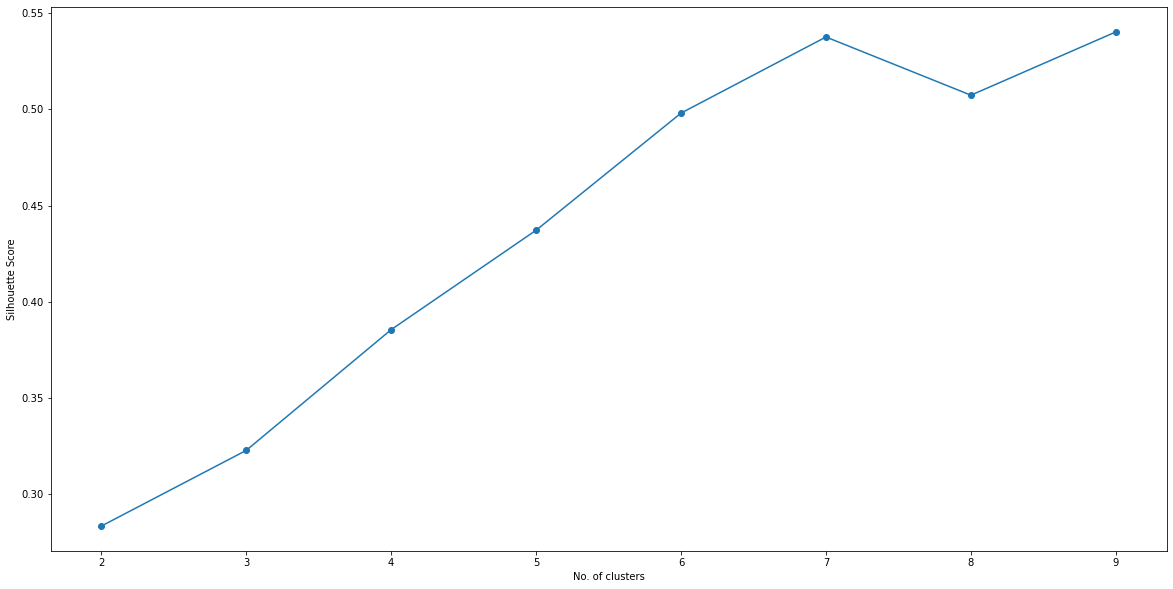

In [40]:
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()
    
indices = []
scores = []
max_range = 10

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    lct = Birmingham_clustering_testing
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(lct)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(lct, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    

plot(max_range, scores, "No. of clusters", "Silhouette Score")


In [41]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

9

In [42]:

# set number of clusters
kclusters = opt

Birmingham_grouped_clustering = Birmingham_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Birmingham_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([6, 0, 0, 2, 3, 1, 2, 5, 5, 0])

## Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [43]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Birmingham_merged = Birmingham_restaurants

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Birmingham_merged = Birmingham_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Birmingham_merged.fillna(0)
Birmingham_merged.head() 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Alum Rock,52.487071,-1.831530,Desi Karahi,52.488817,-1.830819,Asian Restaurant,6,Asian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
38,Balsall Heath,52.457225,-1.883207,Diwan Balti,52.453767,-1.887040,Indian Restaurant,0,Indian Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Pakistani Restaurant,Vietnamese Restaurant,Japanese Curry Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant
39,Balsall Heath,52.457225,-1.883207,Lahore,52.456860,-1.876458,Indian Restaurant,0,Indian Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Pakistani Restaurant,Vietnamese Restaurant,Japanese Curry Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant
40,Balsall Heath,52.457225,-1.883207,Bader Restaurant,52.457440,-1.876448,Moroccan Restaurant,0,Indian Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Pakistani Restaurant,Vietnamese Restaurant,Japanese Curry Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant
43,Balsall Heath,52.457225,-1.883207,Al-Frash Balti,52.457261,-1.876494,Indian Restaurant,0,Indian Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Pakistani Restaurant,Vietnamese Restaurant,Japanese Curry Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant


## Number of venues belonging to each cluster

In [45]:
Birmingham_merged['Cluster Labels'].value_counts()

2    177
0     67
1     19
5     16
3     15
6      4
4      4
8      2
7      2
Name: Cluster Labels, dtype: int64

## Creating map for each cluster for better visualization

In [47]:
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, vc in zip(Birmingham_merged['Venue Latitude'], Birmingham_merged['Venue Longitude'], Birmingham_merged['Venue'], Birmingham_merged['Cluster Labels'], Birmingham_merged['Venue Category']):
    label = folium.Popup(str(poi) +' (' +str(vc) + ') ['+ str(cluster)+']', parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Examine each cluster

## Cluster 1

In [48]:
c1 = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 0, Birmingham_merged.columns[[0]+list(range(8, Birmingham_merged.shape[1]))]]
c1.drop_duplicates()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,Balsall Heath,Indian Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Pakistani Restaurant,Vietnamese Restaurant,Japanese Curry Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant
57,Balti Triangle,Indian Restaurant,Fast Food Restaurant,Turkish Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Pakistani Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Halal Restaurant,Greek Restaurant
196,Bournbrook,Indian Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
227,Brindleyplace,Indian Restaurant,Restaurant,Italian Restaurant,French Restaurant,Vietnamese Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,Fast Food Restaurant,Falafel Restaurant
438,Five Ways,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
738,Kingstanding,Indian Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
781,Lozells,Indian Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
826,Moseley,Indian Restaurant,Restaurant,Thai Restaurant,French Restaurant,Moroccan Restaurant,Spanish Restaurant,Cuban Restaurant,Pakistani Restaurant,Italian Restaurant,Ethiopian Restaurant
942,Rednal,Indian Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
1066,Small Heath,Restaurant,Indian Restaurant,Vietnamese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant


In [50]:
c1_table = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 0, Birmingham_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Birmingham_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c1_table['Venue Latitude'], c1_table['Venue Longitude'], c1_table['Venue'], c1_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Cluster 2

In [51]:
c2 = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 1, Birmingham_merged.columns[[0]+list(range(8, Birmingham_merged.shape[1]))]]
c2.drop_duplicates()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
90,Birchfield,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
268,California,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
319,Cotteridge,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
582,Hamstead,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
627,Hay Mills,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
649,Highter's Heath,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
700,Kents Moat,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
703,Kings Heath,Fast Food Restaurant,Tapas Restaurant,Chinese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant
742,Kitts Green,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
757,Lea Hall,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant


In [53]:
c2_table = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 1, Birmingham_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Birmingham_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c2_table['Venue Latitude'], c2_table['Venue Longitude'], c2_table['Venue'], c2_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [54]:
c3 = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 1, Birmingham_merged.columns[[0]+list(range(8, Birmingham_merged.shape[1]))]]
c3.drop_duplicates()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
90,Birchfield,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
268,California,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
319,Cotteridge,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
582,Hamstead,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
627,Hay Mills,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
649,Highter's Heath,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
700,Kents Moat,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
703,Kings Heath,Fast Food Restaurant,Tapas Restaurant,Chinese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant
742,Kitts Green,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
757,Lea Hall,Fast Food Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant


In [56]:
c3_table = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 2, Birmingham_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Birmingham_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c3_table['Venue Latitude'], c3_table['Venue Longitude'], c3_table['Venue'], c3_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

## Cluster 4

In [57]:
c4 = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 3, Birmingham_merged.columns[[0]+list(range(8, Birmingham_merged.shape[1]))]]
c4.drop_duplicates()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
81,Billesley,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
273,Castle Vale,Chinese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
792,Lyndon Green,Chinese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
813,Marston Green,Chinese Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
914,Perry Beeches,Chinese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
919,Pheasey,Chinese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
932,Quinton,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
938,Reddicap Heath,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
1276,Stockland Green,Chinese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
1542,Walker's Heath,Chinese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant


In [59]:
c4_table = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 3, Birmingham_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Birmingham_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c4_table['Venue Latitude'], c4_table['Venue Longitude'], c4_table['Venue'], c4_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Cluster 5

In [61]:
c5 = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 4, Birmingham_merged.columns[[0]+list(range(8, Birmingham_merged.shape[1]))]]
c5.drop_duplicates()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
264,Buckland End,Restaurant,Vietnamese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
771,Little Bromwich,Restaurant,Vietnamese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
777,Longbridge,Restaurant,Vietnamese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
1661,Woodgate,Restaurant,Vietnamese Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant


In [63]:
c5_table = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 4, Birmingham_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Birmingham_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c5_table['Venue Latitude'], c5_table['Venue Longitude'], c5_table['Venue'], c5_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='gray',
        fill=True,
        fill_color='gray',
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Cluster 6

In [64]:
c6 = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 5, Birmingham_merged.columns[[0]+list(range(8, Birmingham_merged.shape[1]))]]
c6.drop_duplicates()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
170,Boldmere,Indian Restaurant,English Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
179,Bordesley,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
263,Browns Green,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
287,Chinese Quarter,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
331,Deritend,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
470,Garretts Green,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
576,Hall Green,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
630,High Heath,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
638,Highgate,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
1268,Stirchley,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant


In [66]:
c6_table = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 5, Birmingham_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Birmingham_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c6_table['Venue Latitude'], c6_table['Venue Longitude'], c6_table['Venue'], c6_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Cluster 7

In [67]:
c7 = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 6, Birmingham_merged.columns[[0]+list(range(8, Birmingham_merged.shape[1]))]]
c7.drop_duplicates()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Alum Rock,Asian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
731,Kings Norton,Asian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
958,Saltley,Asian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
1551,Ward End,Asian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant


In [69]:
c7_table = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 6, Birmingham_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Birmingham_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c7_table['Venue Latitude'], c7_table['Venue Longitude'], c7_table['Venue'], c7_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='darkred',
        fill=True,
        fill_color='darkred',
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Cluster 8

In [70]:
c8 = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 7, Birmingham_merged.columns[[0]+list(range(8, Birmingham_merged.shape[1]))]]
c8.drop_duplicates()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
763,The Leverretts,Caribbean Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
887,New Town Row,Caribbean Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant


In [72]:
c8_table = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 7, Birmingham_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Birmingham_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c8_table['Venue Latitude'], c8_table['Venue Longitude'], c8_table['Venue'], c8_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='darkblue',
        fill=True,
        fill_color='darkblue',
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Cluster 9

In [73]:
c9 = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 8, Birmingham_merged.columns[[0]+list(range(8, Birmingham_merged.shape[1]))]]
c9.drop_duplicates()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
660,Hockley,Seafood Restaurant,English Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
1544,Walmley,Seafood Restaurant,English Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant


In [75]:
c9_table = Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 8, Birmingham_merged.columns[[0]+[3]+[4]+[5]+list(range(8, Birmingham_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[lat_e, long_e], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, neigh in zip(c9_table['Venue Latitude'], c9_table['Venue Longitude'], c9_table['Venue'], c9_table['Neighborhood'] ):
    label = folium.Popup(str(poi) +', ' +str(neigh), parse_html=True)

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

## Results